# COMP377: AI for Software Developers
## Assignment 1: Linear Regression
### Exercise 1

Name: --------------------------Mahsa Dorri ------------------------------------

Student ID: ----------------------301257460-------------------------

Date: -----------------------------March5---------------------------------

File Name:MahsaDorri_COMP377MiDterm

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from io import StringIO
import requests
from sklearn.feature_selection import RFE


### Part 1: Data Loading

In [25]:

# Load data
#Define the Data url


data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
#Fetch the Dataset
response = requests.get(data_url)
#Read the Dataset
data = pd.read_csv(StringIO(response.text), 
                   names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
                   na_values='?')
print(data.head())
print(data.describe())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.0000

### Part 2: Data Preprocessing

In [17]:
# Drop rows with missing values, modifying the original DataFrame
data.dropna(inplace=True)

# Convert the 'num' column to binary (1 if heart disease present, 0 otherwise)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# List of categorical feature names for preprocessing
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# List of numerical feature names for preprocessing

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create a preprocessing pipeline for both numerical (scaling) and categorical (one-hot encoding) features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Part 3: Create and Train Model

In [19]:
## Part 3: Model Training ###
# Split the dataset into features (X) and the target variable (y)
X = data.drop('num', axis=1)
y = data['num']

# Split the dataset into training and testing sets with a 75-25 split, using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize a Logistic Regression model with a high iteration limit to ensure convergence
logistic_model = LogisticRegression(max_iter=10000)

# Initialize Recursive Feature Elimination (RFE) with the logistic model as the estimator and selecting the top 10 features
rfe = RFE(estimator=logistic_model, n_features_to_select=10)

# Create a pipeline that first applies preprocessing (scaling for numerical and one-hot encoding for categorical features) and then applies RFE for feature selection
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('rfe', rfe)])

# Fit the pipeline to the training data, thereby performing preprocessing, feature selection, and model training in sequence
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=10000),
                     n_features_to_select=10))])

### Part 4: Test Model

In [20]:
### Part 4: Model Evaluation ###
# This line predicts the presence of heart disease in the test set using the preprocessed features and the trained logistic regression model within the pipeline.
y_pred = pipeline.predict(X_test)


### Part 5: Calculate Accuracy & Accuracy

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model with RFE: {accuracy:.4f}")
#This code calculates and prints the accuracy of the logistic regression model with Recursive Feature Elimination (RFE) on the test data.

Accuracy of Logistic Regression model with RFE: 0.8933


### Visualization and Display (Optional)

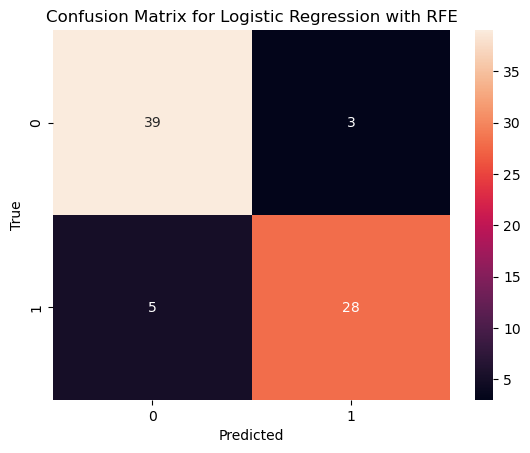

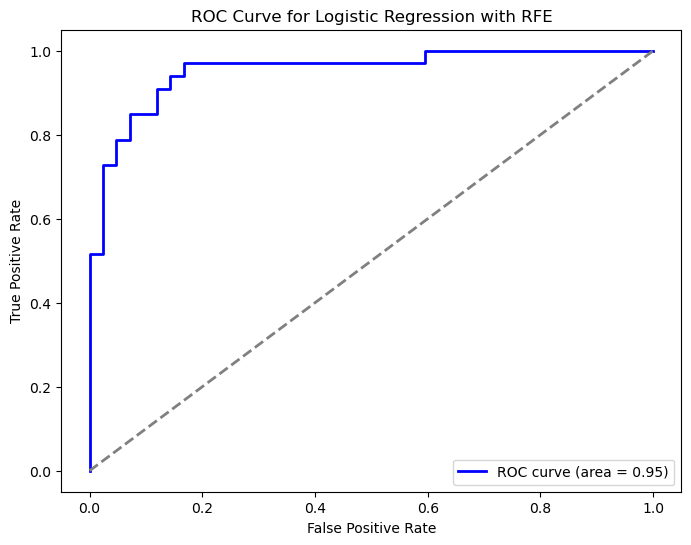

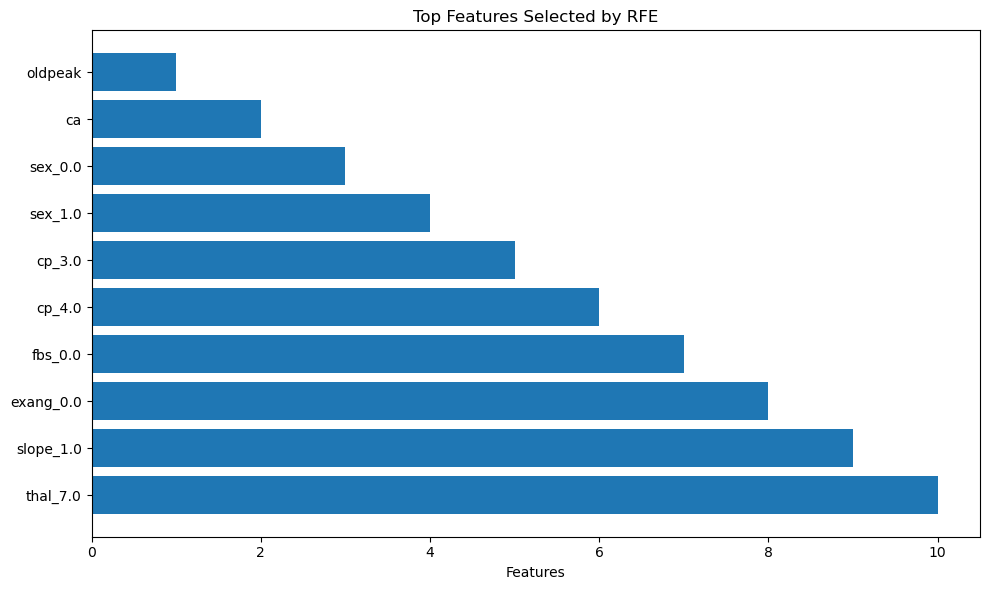

In [22]:
### Visualization & Display ###
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression with RFE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with RFE')
plt.legend(loc="lower right")
plt.show()

# Extract the feature rankings and support
rfe_instance = pipeline.named_steps['rfe']
feature_support = rfe_instance.support_
transformed_cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, transformed_cat_features])

# Filter to get the selected features only
selected_features = all_features[feature_support]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features, range(1, len(selected_features) + 1))
plt.xlabel('Features')
plt.title('Top Features Selected by RFE')
plt.gca().invert_yaxis()  # To display the top feature at the top
plt.tight_layout()
plt.show()
plt.show()

Test the moDel with new Data

In [23]:
new_patient_data = pd.DataFrame({
    'age': [55],        
    'sex': [0],         
    'cp': [3],          
    'trestbps': [135],  
    'chol': [250],      
    'fbs': [0],         
    'restecg': [2],     
    'thalach': [160],   
    'exang': [1],       
    'oldpeak': [1.5],   
    'slope': [1],       
    'ca': [0],          
    'thal': [3]         
})
new_patient_prediction = pipeline.predict(new_patient_data)


print("Prediction for the updated new patient data (0 = No Heart Disease, 1 = Heart Disease):", new_patient_prediction[0])


Prediction for the updated new patient data (0 = No Heart Disease, 1 = Heart Disease): 0


### Summary and Conclusions

The model used to predict heart disease performs well, with 89% of its predictions being correct and a 95% chance of accurately separating patients with and without heart disease. This means it does a good job at identifying those who are sick and those who are not. Using steps to prepare the data and pick the best features helped make it effective. To make sure it works well in general, checking it with more data or different methods is a good idea.